<p><font size="6"><b>01 - Pandas: Data Structures </b></font></p>


> *© 2016-2018, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd

In [3]:
%matplotlib inline 
# to show a figure inline in notebook
import numpy as np
import matplotlib.pyplot as plt

# The pandas data structures: `DataFrame` and `Series`

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## DataFrame: 2D tabular data


A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.

<img align="left" width=50% src="../img/schema-dataframe.svg">

For the examples here, we are going to create a small DataFrame with some data about a few countries.

When creating a DataFrame manually, a common way to do this is from dictionary of arrays or lists:

In [4]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [6]:
type(countries)

pandas.core.frame.DataFrame

In practice, you will of course often import your data from an external source (text file, excel, database, ..), which we will see later.

Note that in the IPython notebook, the dataframe will display in a rich HTML view.

### Attributes of the DataFrame

The DataFrame has a built-in concept of named rows and columns, the **`index`** and **`columns`** attributes:

In [7]:
countries.index

RangeIndex(start=0, stop=5, step=1)

By default, the index is the numbers *0* through *N - 1*

In [8]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

To check the data types of the different columns:

In [9]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [12]:
countries.describe()

,area,population
count,5.000000,5.000000
mean,269042.800000,47.740000
std,264012.827994,31.519645
min,30510.000000,11.300000
25%,41526.000000,16.900000
50%,244820.000000,64.300000
75%,357050.000000,64.900000
max,671308.000000,81.300000


A DataFrame has also a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [11]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

<div class="alert alert-info">

**NumPy** provides

  <ul>
    <li>multi-dimensional, homogeneously typed arrays  (single data type!)</li>
  </ul> 
<br>

**Pandas** provides

  <ul>
    <li>2D, heterogeneous data structure (multiple data types!)</li>
    <li>labeled (named) row and column index</li>
  </ul> 


</div>

## One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [20]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

And often, you access a Series representing a column in the data, using typical `[]` indexing syntax and the column name:

In [15]:
area = countries['area']
print(area)

0     30510
1    671308
2    357050
3     41526
4    244820
Name: area, dtype: int64


In [17]:
type(area)

pandas.core.series.Series

In [18]:
countries.population

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

### Attributes of a Series: `index` and `values`

The series also has an **index**, which by default is the numbers *0* through *N - 1* (but no `.columns`):

In [21]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [22]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [23]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [24]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [25]:
s2['c']

2

### Pandas Series versus dictionaries

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [26]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

We can index the populations like a dict as expected ...

In [27]:
population['France']

64.3

... but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [28]:
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

In [33]:
countries['capital']

0     Brussels
1        Paris
2       Berlin
3    Amsterdam
4       London
Name: capital, dtype: object

In [34]:
countries['capital'].str.upper()

0     BRUSSELS
1        PARIS
2       BERLIN
3    AMSTERDAM
4       LONDON
Name: capital, dtype: object

## Some useful methods on these data structures

Exploration of the Series and DataFrame is essential (check out what you're dealing with). 

In [35]:
countries.head() # Top rows

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


In [36]:
countries.tail() # Bottom rows

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


The ``describe`` method computes summary statistics for each column:

In [37]:
countries.describe()

,area,population
count,5.000000,5.000000
mean,269042.800000,47.740000
std,264012.827994,31.519645
min,30510.000000,11.300000
25%,41526.000000,16.900000
50%,244820.000000,64.300000
75%,357050.000000,64.900000
max,671308.000000,81.300000


**Sort**ing your data **by** a specific column is another important first-check:

In [38]:
countries.sort_values(by='population')

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
3,41526,Amsterdam,Netherlands,16.9
1,671308,Paris,France,64.3
4,244820,London,United Kingdom,64.9
2,357050,Berlin,Germany,81.3


The **`plot`** method can be used to quickly visualize the data in different ways:

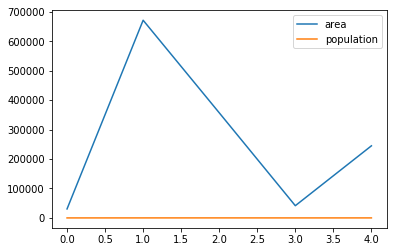

In [39]:
countries.plot()

However, for this dataset, it does not say that much:

In [ ]:
countries['population'].plot(kind='barh')

<div class="alert alert-success">
<b>EXERCISE</b>:

<ul>
<li>You can play with the `kind` keyword of the `plot` function in the figure above: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin', 'box'</li>
</ul>
</div>

# Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* Parquet
* ...

In [ ]:
pd.read_

In [ ]:
countries.to_

<div class="alert alert-info">


**Note: I/O interface**


  <ul>
    <li>All readers are `pd.read_...`</li>
    <li>All writers are `DataFrame.to_...` </li>
  </ul> 


</div>

# Application on a real dataset

Throughout the pandas notebooks, many of exercises will use the titanic dataset. This dataset has records of all the passengers of the Titanic, with characteristics of the passengers (age, class, etc. See below), and an indication whether they survived the disaster.


The available metadata of the titanic data set provides the following information:

VARIABLE   |  DESCRIPTION
------ | --------
survival       | Survival (0 = No; 1 = Yes)
pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name           | Name
sex            | Sex
age            | Age
sibsp          | Number of Siblings/Spouses Aboard
parch          | Number of Parents/Children Aboard
ticket         | Ticket Number
fare           | Passenger Fare
cabin          | Cabin
embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Read the CVS file (available at `../data/titanic.csv`) into a pandas DataFrame. Call the result `df`.</li>
</ul>
</div>

In [42]:
df = pd.read_csv('../data/titanic.csv')

In [43]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [44]:
# %load _solutions/pandas_01_data_structures1.py
df = pd.read_csv("../data/titanic.csv")

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Quick exploration: show the first 5 rows of the DataFrame.</li>
</ul>
</div>

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# %load _solutions/pandas_01_data_structures2.py
df.head()

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>How many records (i.e. rows) has the titanic dataset?</li>
</ul>
</div>

In [48]:
df.shape

(891, 12)

In [50]:
# %load _solutions/pandas_01_data_structures3.py
len(df)

891

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Select the 'Age' column (remember: we can use the [] indexing notation and the column label).</li>
</ul>
</div>

In [51]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [52]:
# %load _solutions/pandas_01_data_structures4.py
df['Age']

<div class="alert alert-success">
    <b>EXERCISE</b>:

<ul>
    <li>Make a box plot of the Fare column.</li>
</ul>
</div>

In [54]:
df['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

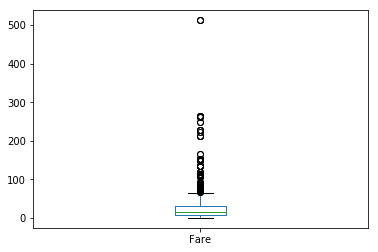

In [56]:
df['Fare'].plot(kind='box')

In [57]:
# %load _solutions/pandas_01_data_structures5.py
df['Fare'].plot(kind='box')

<div class="alert alert-success">
    <b>EXERCISE</b>:

 <ul>
  <li>Sort the rows of the DataFrame by 'Age' column, with the oldest passenger at the top. Check the help of the `sort_values` function and find out how to sort from the largest values to the lowest values</li>
</ul>
</div>

In [58]:
df['Age'].sort_values(ascending=False)

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
745    70.0
672    70.0
33     66.0
456    65.0
280    65.0
54     65.0
545    64.0
438    64.0
483    63.0
275    63.0
555    62.0
570    62.0
829    62.0
252    62.0
625    61.0
326    61.0
170    61.0
366    60.0
587    60.0
684    60.0
694    60.0
94     59.0
232    59.0
268    58.0
487    58.0
       ... 
718     NaN
727     NaN
732     NaN
738     NaN
739     NaN
740     NaN
760     NaN
766     NaN
768     NaN
773     NaN
776     NaN
778     NaN
783     NaN
790     NaN
792     NaN
793     NaN
815     NaN
825     NaN
826     NaN
828     NaN
832     NaN
837     NaN
839     NaN
846     NaN
849     NaN
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

In [59]:
# %load _solutions/pandas_01_data_structures6.py
df.sort_values(by='Age', ascending=False)

---
# Acknowledgement


> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).
